# Live Coding Session 5:
What you will learn in this session:
 * Access web-data via API. Here by the example of the [Quandl api](https://www.quandl.com/tools/python).
 * [Pandas Dataframes](../Lecture/PD01Pandas.ipynb)
     * xxx
 * Handling [date and time](../Lecture/09DateTime.ipynb)
 * Visualisation of time-series data with [Matplotlib](../Lecture/PLT01visualization.ipynb)
 
In this session we will access stock-prices of selected companies via the [Quandl api](https://www.quandl.com/tools/python). For this, a free *Quandl* account and an *API-KEY* must be generated, as described in the [Quandl documentation](https://docs.quandl.com). It is recommended to save the API-KEY in a .json file. The key is required before sending the first query in a Quandl-session. 

## Subtask 1: Access file which maps ticker-symbols to company names

Quandl can be queried for stock-prices of specified companies. In the queries the company is not specified by it's name, but by it's *ticker-symbol*. For determining a companies ticker-symbol this
[Ticker Symbols file](https://s3.amazonaws.com/quandl-static-content/Ticker+CSV%27s/secwiki_tickers.csv) can be applied. 

1. Read this file into a Pandas dataframe and display it's contest.
2. Determine the ticker symbols of at least 3 different companies from the `Technology`-sector.

In [6]:
#!pip install quandl

In [7]:
import quandl
from IPython.display import display
import json

In [8]:
import pandas as pd
 
df = pd.read_csv('secwiki_tickers.csv')
display(df.head(10))

,Ticker,Name,Sector,Industry,Price,Collection
0,A,Agilent Technologies Inc.,Healthcare,Medical Laboratories & Research,WIKI/A,stocks/a
1,AA,Alcoa Inc.,Basic Materials,Aluminum,WIKI/AA,stocks/aa
2,AAME,Atlantic American Corp.,Financial,Life Insurance,NaN,stocks/aame
3,AAN,"Aaron's, Inc.",Services,Rental & Leasing Services,WIKI/AAN,stocks/aan
4,AAON,AAON Inc.,Industrial Goods,General Building Materials,WIKI/AAON,stocks/aaon
5,AAP,Advance Auto Parts Inc.,Services,Auto Parts Stores,WIKI/AAP,stocks/aap
6,AAT,"American Assets Trust, Inc.",Financial,REIT - Retail,NaN,NaN
7,AAPL,Apple Inc.,Consumer Goods,Electronic Equipment,WIKI/AAPL,stocks/aapl
8,AAWW,Atlas Air Worldwide Holdings Inc.,Services,"Air Services, Other",WIKI/AAWW,stocks/aaww
9,ABAX,"Abaxis, Inc.",Healthcare,Diagnostic Substances,WIKI/ABAX,stocks/abax


In [9]:
df['Name'].filter(like="Apple")


Series([], Name: Name, dtype: object)

In [10]:
techdf=df[df["Sector"]=="Technology"]
display(techdf)

,Ticker,Name,Sector,Industry,Price,Collection
23,ABTL,Autobytel Inc.,Technology,Internet Information Providers,NaN,stocks/abtl
28,ACCL,Accelrys Inc.,Technology,Application Software,WIKI/ACCL,stocks/accl
39,ACIW,"ACI Worldwide, Inc.",Technology,Technical & System Software,WIKI/ACIW,stocks/aciw
41,ACLS,Axcelis Technologies Inc.,Technology,Semiconductor Equipment & Materials,WIKI/ACLS,stocks/acls
43,ACN,Accenture plc,Technology,Information Technology Services,WIKI/ACN,stocks/acn
54,ACXM,Acxiom Corporation,Technology,Information Technology Services,WIKI/ACXM,stocks/acxm
56,ADAT,Authentidate Holding Corp.,Technology,Healthcare Information Services,NaN,stocks/adat
57,ADBE,Adobe Systems Inc.,Technology,Application Software,WIKI/ADBE,stocks/adbe
61,ADI,"Analog Devices, Inc.",Technology,Semiconductor - Integrated Circuits,WIKI/ADI,stocks/adi
64,ADNC,"Audience, Inc.",Technology,Semiconductor - Integrated Circuits,WIKI/ADNC,stocks/adnc


## Subtask 2

In the following code-cell the Quandl API-KEY is imported from the .json-file and the API is configured with this personal key. As described above, for getting the key a free Quandl-account must be established.

1. Access the [WIKI Prices database from Quandl](https://www.quandl.com/databases/WIKIP) and query `date`- and `adj_close` (adjusted closing price) over a period of at least one year of 3 *Technology*-Sector companies of your choice. (See e.g. [Quandl Python API Introduction](https://www.quandl.com/tools/python)).
2. Display the returned dataframe.

In [11]:
with open("quandl.json","r") as f:
    cred = json.load(f)
quandl.ApiConfig.api_key = cred['API-KEY']

In [12]:
data = quandl.get_table('WIKI/PRICES', ticker = ['ADBE', 'MSFT', 'YELP'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2016-12-31', 'lte': '2018-03-22' }, paginate=True)

In [13]:
display(data.head())
display(data.tail())
data.shape

,ticker,date,adj_close
None,,,
0,YELP,2018-03-22,42.94
1,YELP,2018-03-21,44.82
2,YELP,2018-03-20,45.07
3,YELP,2018-03-19,45.51
4,YELP,2018-03-16,45.92


,ticker,date,adj_close
None,,,
912,ADBE,2017-01-09,108.57
913,ADBE,2017-01-06,108.30
914,ADBE,2017-01-05,105.91
915,ADBE,2017-01-04,104.14
916,ADBE,2017-01-03,103.48


(917, 3)

## Subtask 3: Restructure Dataframe
The dataframe, which has been returned by the query in the previous task shall now be restructured, such that:
1. The `date`-column is used as index.
2. The dataframe contains for each of the 3 companies a single column, which contains the `adj_close` value of the day, defined by the index. I.e. the new dataframe consists of the date-index plus the 3 company-columns:

In [14]:
# create a new dataframe with 'date' column as index
new = data.set_index('date')
display(new.head())

,ticker,adj_close
date,,
2018-03-22,YELP,42.94
2018-03-21,YELP,44.82
2018-03-20,YELP,45.07
2018-03-19,YELP,45.51
2018-03-16,YELP,45.92


In [15]:
# use pandas pivot function to sort adj_close by tickers
clean_data = new.pivot(columns='ticker')
display(clean_data.head())
print(clean_data.columns)

adj_close                  
ticker          ADBE       MSFT   YELP
date                                  
2017-01-03    103.48  61.219142  38.22
2017-01-04    104.14  60.945231  39.42
2017-01-05    105.91  60.945231  39.62
2017-01-06    108.30  61.473488  39.31
2017-01-09    108.57  61.277837  40.14

MultiIndex(levels=[['adj_close'], ['ADBE', 'MSFT', 'YELP']],
           labels=[[0, 0, 0], [0, 1, 2]],
           names=[None, 'ticker'])


## Subtask 4: Visualize stock-price time-series
1. Visualize the 3 stock-price time-series `adj_close` vs. `date` either by the corresponding Pandas-methods (which apply *Matplotlib*) or by applying *Matplotlib* directly.

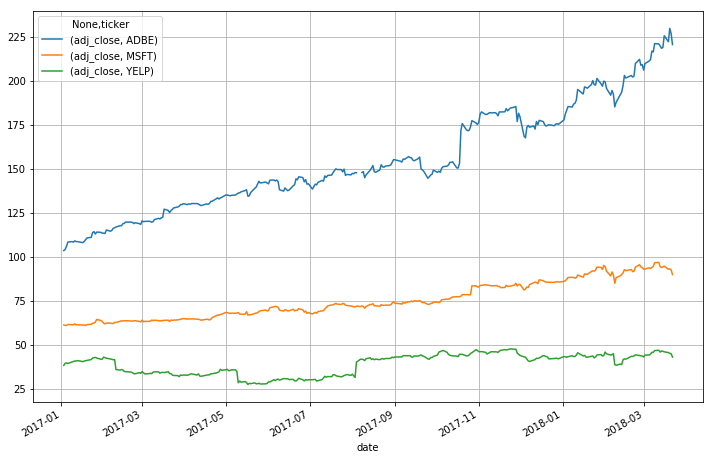

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
clean_data.plot(figsize=(12,8),grid=True)
plt.show()

## Subtask 5: Smoothing

1. In order to ignore short-term (daily) changes the stock-price of one company shall be smoothed. See e.g. [Pandas documentation rolling()](https://pandas.pydata.org/pandas-docs/stable/computation.html#rolling-windows). 
2. Visualize the raw and the smoothed stock-price time series and experiment with different smoothing-window-types. 

In [17]:
adobe=data[data["ticker"]=="ADBE"]
display(adobe.head(10))
print(adobe.shape)

,ticker,date,adj_close
None,,,
612,ADBE,2018-03-22,220.52
613,ADBE,2018-03-21,226.85
614,ADBE,2018-03-20,229.75
615,ADBE,2018-03-19,222.18
616,ADBE,2018-03-16,225.55
617,ADBE,2018-03-15,218.87
618,ADBE,2018-03-14,218.44
619,ADBE,2018-03-13,219.76
620,ADBE,2018-03-12,220.94


(305, 3)


In [18]:
microsoft=data[data["ticker"]=="MSFT"]
display(microsoft.head(10))
print(microsoft.shape)

,ticker,date,adj_close
None,,,
306,MSFT,2018-03-22,89.79
307,MSFT,2018-03-21,92.48
308,MSFT,2018-03-20,93.13
309,MSFT,2018-03-19,92.89
310,MSFT,2018-03-16,94.60
311,MSFT,2018-03-15,94.18
312,MSFT,2018-03-14,93.85
313,MSFT,2018-03-13,94.41
314,MSFT,2018-03-12,96.77


(306, 3)


In [19]:
yelp=data[data["ticker"]=="YELP"]
display(yelp.head(10))
print(yelp.shape)

,ticker,date,adj_close
None,,,
0,YELP,2018-03-22,42.94
1,YELP,2018-03-21,44.82
2,YELP,2018-03-20,45.07
3,YELP,2018-03-19,45.51
4,YELP,2018-03-16,45.92
5,YELP,2018-03-15,46.25
6,YELP,2018-03-14,46.44
7,YELP,2018-03-13,45.79
8,YELP,2018-03-12,46.81


(306, 3)


In [20]:
s=yelp["adj_close"].rolling(window=5,win_type="gaussian").mean(std=1.5)
#yelp["smoothed_close"]=s.iloc[:,0]
#print(type(s))
yelp = yelp.assign(smoothed=s.values)
yelpNew=yelp.set_index("date")
yelpNew=yelpNew.drop(labels="ticker",axis=1)

In [21]:
display(yelp.head(10))

,ticker,date,adj_close,smoothed
None,,,,
0,YELP,2018-03-22,42.94,NaN
1,YELP,2018-03-21,44.82,NaN
2,YELP,2018-03-20,45.07,NaN
3,YELP,2018-03-19,45.51,NaN
4,YELP,2018-03-16,45.92,44.960737
5,YELP,2018-03-15,46.25,45.508987
6,YELP,2018-03-14,46.44,45.861664
7,YELP,2018-03-13,45.79,46.073163
8,YELP,2018-03-12,46.81,46.225528


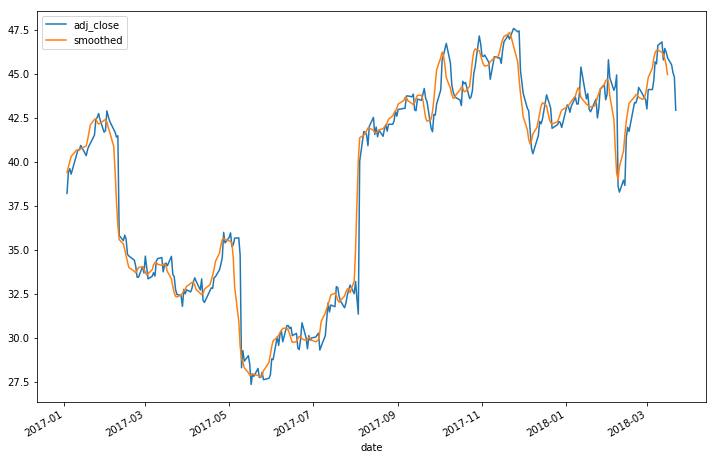

In [22]:
yelpNew.plot(figsize=(12,8))

## Subtask 6: Change point detection
1. Suggest and implement a simple method to find the positions within the time-series, where an extraordinary decrease or increasse occurs.
2. Visualize the detected change points in the time-series plot.

In [23]:
change=yelpNew.diff()

In [24]:
display(change.head())

,adj_close,smoothed
date,,
2018-03-22,NaN,NaN
2018-03-21,1.88,NaN
2018-03-20,0.25,NaN
2018-03-19,0.44,NaN
2018-03-16,0.41,NaN


In [25]:
change.describe()

,adj_close,smoothed
count,305.000000,301.000000
mean,-0.015475,-0.018491
std,1.021314,0.481460
min,-8.680000,-2.601095
25%,-0.390000,-0.230183
50%,-0.010000,-0.064370
75%,0.340000,0.162630
max,6.370000,1.937222


In [26]:
std=change.std()
m=change.mean()["smoothed"]
bound=3*std["smoothed"]

In [27]:
fall=change["smoothed"] < m-1*bound
rise=change["smoothed"] > m+bound
changeOutlier=change[fall | rise]

In [28]:
changeOutlier

,adj_close,smoothed
date,,
2018-02-05,-0.21,1.661324
2017-08-02,0.88,-2.388947
2017-08-01,0.97,-2.601095
2017-07-31,-0.69,-1.830774
2017-05-08,1.00,1.429684
2017-05-05,-0.02,1.937222
2017-05-04,-0.38,1.615119
2017-02-07,0.28,1.698695


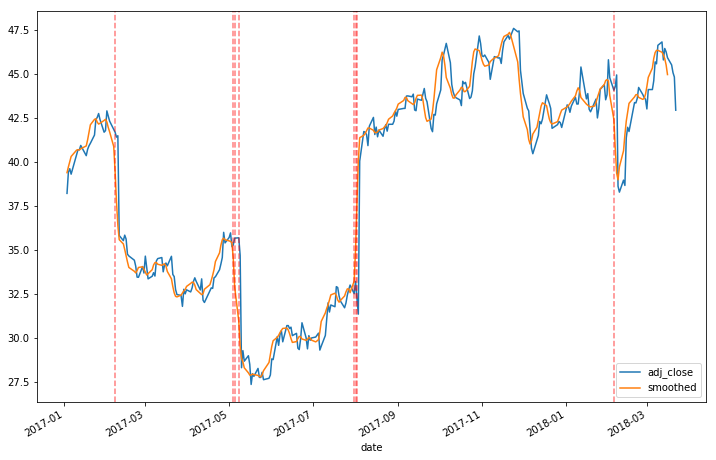

In [29]:
yelpNew.plot(figsize=(12,8))
for a in changeOutlier.index:
    plt.axvline(x=a.date(),color="red",ls="--",alpha=0.5)